# QMP 8 circuits on Quantum Devices
## Qiskit codes for G3D2M2 columns in Fig. 6 and 7

In [13]:
import qiskit.tools.jupyter

%qiskit_version_table

In [1]:
from qiskit import *
from qiskit import IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_circuit_layout

from qiskit.providers.jobstatus import JobStatus
from qiskit.tools.monitor import job_monitor

from utils import *
from circuit_func import *


In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(YOUR_PROVIDER)

In [3]:
backend_device = provider.backend.ibm_washington

In [4]:
# solutions : [Least Significant <-> Most Singnificant]
sol = [0,1,1,0,1]
shots = 8192
repetition = 30 # number of times running on device

In [5]:

def qc_G3D2M2(sol, guess_sol = None) -> QuantumCircuit:

    q = QuantumRegister(6)
    c = ClassicalRegister(2)
    
    qc = QuantumCircuit(q)

    guess_pos = [0,2,3]
    if guess_sol == None:
        guess_sol = [sol[0],sol[1],sol[2]]

    search_pos =   [4,5]  

    for i in search_pos:
        qc.h(i)

    for i in range(len(guess_pos)):
        if guess_sol[i] == 1:
            qc.x(guess_pos[i])
        else: continue
        
    #print(sol)
    sol = np.insert(sol,1,2)
    #print(sol)

    oracle_uncompute(qc,q,[0,1,2,3,4,5],sol)

    diffusion_2q(qc, q, [4,5])

    return qc


# No QMP

In [6]:
n=6
m=1 # number of circuits

In [7]:
q_nomp = QuantumRegister(m*n, 'q')
c_nomp = ClassicalRegister(m*(n-4))

qc_nomp = QuantumCircuit(q_nomp, c_nomp)

qc_nomp.append(qc_G3D2M2(sol, [0,1,1]), range(0, 6))

qc_nomp.measure([4,5],[0,1])


Depth:  2


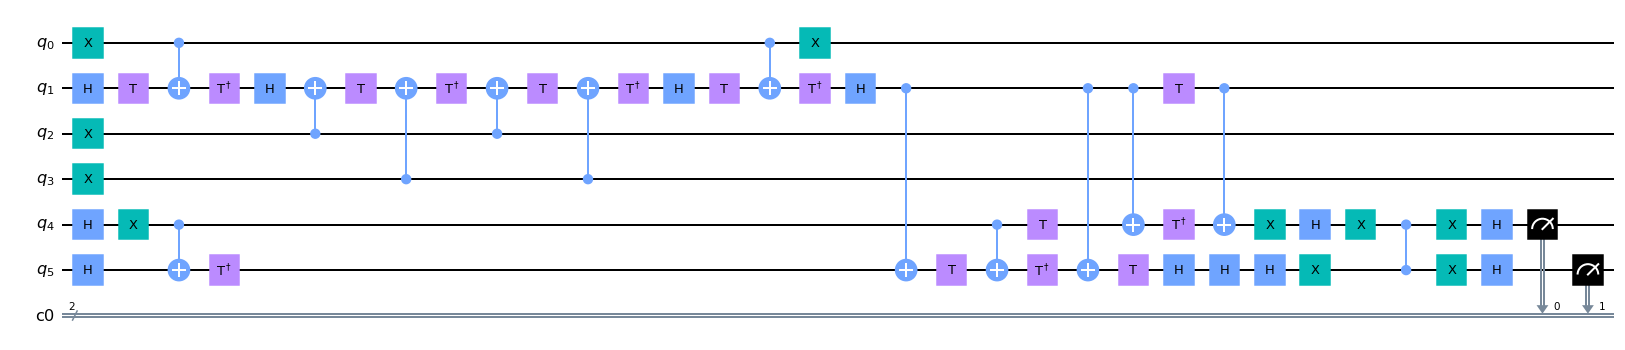

In [9]:
print('Depth: ', qc_nomp.depth())
qc_nomp.decompose().draw('mpl', fold=55)

Depth:  44


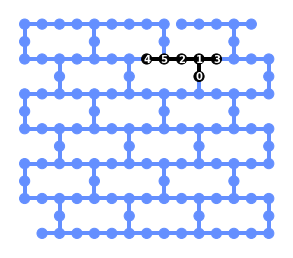

In [10]:
backend_device = provider.backend.ibm_washington
layout = None

qc_nomp_trans_layout = transpile(qc_nomp, backend_device, optimization_level=3, initial_layout=layout)
print('Depth: ', qc_nomp_trans_layout.depth())
plot_circuit_layout(qc_nomp_trans_layout, backend_device)

In [13]:
for _ in range(repetition):
    job_nomp_layout = backend_device.run(qc_nomp_trans_layout, shots=shots)
    job_id = job_nomp_layout.job_id()
    print("Job id", job_id)

Job id 62ab9e212927900fc2bad90c
Job id 62ab9e22440f581507aea74c
Job id 62ab9e2300686239b8087842
Job id 62ab9e234d3a7947af871ace
Job id 62ab9e2421544e0ab0029851
Job id 62ab9e255e6b2aaa4081d339
Job id 62ab9e2622eb883934ab7fae
Job id 62ab9e26e885f79ad79fa64f
Job id 62ab9e27f09eced2a0e38212
Job id 62ab9e2721544ec9b7029852
Job id 62ab9e285e6b2a0d4a81d33a
Job id 62ab9e2822eb880f96ab7faf
Job id 62ab9e29e885f75d269fa650
Job id 62ab9e2af09ece8108e38213
Job id 62ab9e2a21544e562a029853
Job id 62ab9e2b5e6b2a1f5881d33b
Job id 62ab9e2b22eb885511ab7fb0
Job id 62ab9e2ce885f7739a9fa651
Job id 62ab9e2cf09ece435ce38214
Job id 62ab9e2d21544e5552029854
Job id 62ab9e2d5e6b2adbfe81d33c
Job id 62ab9e2e22eb8833dbab7fb1
Job id 62ab9e2fe885f784819fa652
Job id 62ab9e2ff09ece4410e38215
Job id 62ab9e3021544e6631029855
Job id 62ab9e305e6b2a786a81d33d
Job id 62ab9e310068620f94087843
Job id 62ab9e324d3a792fe4871ad0
Job id 62ab9e32f6d9375bd6995078
Job id 62ab9e335e6b2a321d81d33e


# QMP: 8 circuits

In [11]:
n=6
m=8 # number of circuits
q_mp = QuantumRegister(m*n, 'q')
c_mp = ClassicalRegister(m*(n-4))

qc_mp = QuantumCircuit(q_mp, c_mp)  # 0 applications of Q, only a single A operator

qc_mp.append(qc_G3D2M2(sol, [0,0,0]), range(n*0,n*1))
qc_mp.append(qc_G3D2M2(sol, [1,0,0]), range(n*1,n*2))
qc_mp.append(qc_G3D2M2(sol, [0,1,0]), range(n*2,n*3))
qc_mp.append(qc_G3D2M2(sol, [1,1,0]), range(n*3,n*4))

qc_mp.append(qc_G3D2M2(sol, [0,0,1]), range(n*4,n*5))
qc_mp.append(qc_G3D2M2(sol, [1,0,1]), range(n*5,n*6))
qc_mp.append(qc_G3D2M2(sol, [0,1,1]), range(n*6,n*7)) # solution
qc_mp.append(qc_G3D2M2(sol, [1,1,1]), range(n*7,n*8))

for i in range(m):    
    qc_mp.measure([4 + i*n, 5 + i*n],[0+i*(n-4), 1+i*(n-4)])


# QMP: 8 circuits, Washington, Layout Setting

Depth:  50


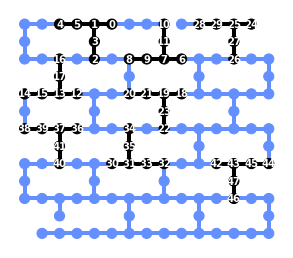

In [17]:
layout = [5,4,22,15,2,3,     27,26,24,25,8,16,    40,39,37,38,20,33,    46,45,43,44,64,54,   13,12,30,17,10,11,    80,81,83,82,62,72,   59,58,56,57,77,71,     86,87,89,88,106,93]

qc_mp_trans_layout = transpile(qc_mp, backend_device, optimization_level=3, initial_layout=layout)

print('Depth: ', qc_mp_trans_layout.depth())

plot_circuit_layout(qc_mp_trans_layout, backend_device)

In [18]:
for _ in range(repetition):
    job_mp_layout = backend_device.run(qc_mp_trans_layout, shots=shots)
    job_id = job_mp_layout.job_id()
    print("Job id", job_id)

Job id 62ab9fe021544e35d302986a
Job id 62ab9fe15e6b2a32b381d357
Job id 62ab9fe20068622eed08785c
Job id 62ab9fe3f09ece28d1e3822a
Job id 62ab9fe32927906c67bad91f
Job id 62ab9fe4006862536f08785d
Job id 62ab9fe5f09ecea35be3822b
Job id 62ab9fe7440f5886faaea759
Job id 62ab9fe7006862d38a08785e
Job id 62ab9fe84d3a795c1d871ae3
Job id 62ab9feaf6d9377e4499508a
Job id 62ab9fea5e6b2a7a2781d358
Job id 62ab9feb006862c69e08785f
Job id 62ab9feef09ece46b1e3822c
Job id 62ab9fef21544e212602986b
Job id 62ab9fef5e6b2a22c581d359
Job id 62ab9ff00068624b60087860
Job id 62ab9ff1f09ece66e3e3822d
Job id 62ab9ff221544e60a502986c
Job id 62ab9ff322eb88c27dab7fc7
Job id 62ab9ff34d3a796e5c871ae5
Job id 62ab9ff5f6d93785fc99508b
Job id 62ab9ff5292790dd48bad921
Job id 62ab9ff6440f5890dcaea75a
Job id 62ab9ff74d3a79b2f9871ae6
Job id 62ab9ff8f6d937576199508c
Job id 62ab9ff82927905d9dbad922
Job id 62ab9ff9440f5855ccaea75b
Job id 62ab9ffa006862ce47087861
Job id 62ab9ffa4d3a7944e9871ae7
